## August 2023

### 77. Combinations

In [ ]:
class Solution:
    def combine(self, n: int, k: int) -> List[List[int]]:
        c = itertools.combinations(range(1, n+1), k)
        return [list(cm) for cm in c]

- I don't feel like taking credit for this because I didn't really do anything; `itertools.combinations()` did the work for me.

### 46. Permutations

In [ ]:
class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        p = itertools.permutations(nums, len(nums))
        return [list(pm) for pm in p]

- There's not much to explain here; I used `itertools.permutations()` to get all of the permutations and then returned them.

### 17. Letter Combinations of a Phone Number

In [ ]:
class Solution:
    def letterCombinations(self, digits: str) -> List[str]:
        phonedict = dict()
        phonedict[2], phonedict[3], phonedict[4], phonedict[5], phonedict[6] = 'abc', 'def', 'ghi', 'jkl', 'mno'
        phonedict[7], phonedict[8], phonedict[9] = 'pqrs', 'tuv', 'wxyz'

        res = []
        def rec(digits, word, c, i):
            if i > len(digits):
                return
            word += c
            if len(word) == len(digits):
                res.append(word)
                return
            for c in phonedict[int(digits[i])]:
                rec(digits, word, c, i+1)
        rec(digits, '', '', 0)

        return [r for r in res if r != ""]

- First, I saved the strings corresponding to a digit on the phone in the dictionary `phonedict`.
- Then I used the recursive function `rec`, to accumulate every combination of letters for the given `digits`.  

### 139. Word Break

In [ ]:
class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:
        wordDict = set(wordDict)
        res, seen = False, set()

        def bt(constructed, remainder, wordDict):
            # memoization happens here. we keep track of the words we have already tried so we don't end up trying them again
            if constructed not in seen: seen.add(constructed)
            else: return
            
            # we have succesfully constructed the string from wordDict
            if not remainder:
                nonlocal res 
                res = True
                return

            for word in wordDict:
                if remainder.startswith(word):
                    bt(constructed + word, remainder[len(word):], wordDict)
            return

        bt("", s, wordDict)
        return res

- We perform a DFS to construct `s` with the given `wordList`.
- On every recursive call, we iterate over `wordList`, and start another recursive call for every `word` that matches the beginning of the `remainder` of `s`.
- Eventually we will either have no `remainder`, which means that we have successfully constructed `s`, or we don't have any words left that match the beginning of the `remainder`, at which point we cut off.

### 95. Unique Binary Search Trees II

In [ ]:
class Solution:
    def getTrees(self, start, end):
        if start > end:  # the current node does not have any subtrees
            return [None]
        
        # for every node i in the range of n, we calculate the node's left and right subtrees
        res = []
        for root in range(start, end+1):
            leftTrees = self.getTrees(start, root-1)  # i.e. for root: 3  leftTrees:  Trees(1,2) -> ...
            rightTrees = self.getTrees(root+1, end)   #                   rightTrees: Trees(4,3) -> [None]

            # actually build the trees and add them to res
            for l in leftTrees:
                for r in rightTrees:
                    res.append(TreeNode(root, l, r))

        return res

    def generateTrees(self, n: int) -> List[Optional[TreeNode]]:
        return self.getTrees(1, n)

- Unfortunately, I wasn't able to come up with a solution to this on my own, so I looked into the editorial section.
- How it works is that we recursively calculate every possible left and right subtree for every `root` in the range `n`.
- The left subtrees, `leftTrees`, will be all possible trees in the range `1` to `root-1`, while the right subtrees, `rightTrees`, will be all possible trees in the range `root+1` to `n`.

### 920. Number of Music Playlists

In [ ]:
class Solution:
    def numMusicPlaylists(self, n: int, goal: int, k: int) -> int:
        MOD = 1_000_000_007
        dp = [ [0 for _ in range(n + 1)] for _ in range(2) ]
        dp[0][0] = 1

        # i: length of the playlist  j: unique songs in the playlist
        # dp[i][j]: number of playlists constructable with i and j
        for i in range(1, goal+1):
            dp[i%2][0] = 0
            for j in range(1, min(i,n)+1): # min(i,n) because there could be less songs available(n) than the length of the playlist(i)
                dp[i%2][j] = dp[(i-1)%2][j-1] * (n-j + 1)) % MOD # n - j  is the number of songs to choose from, having picked j songs already
                if j > k:
                    dp[i%2][j] = (dp[i%2][j] + dp[(i-1)%2][j] * (j-k)) % MOD

        return dp[goal%2][n]

- I did not come up with this solution myself, that much is for sure.
- This is also the first time that I don't really understand a solution even after looking at it, so I can't really give an explanation here.

### 74. Search a 2D Matrix

In [ ]:
class Solution:
    def bin(self, nums: List[int], l: int, r: int, target: int) -> bool:
        if r >= l:
            middle = l + (r-l)//2

            if nums[middle] == target:
                return True
            elif nums[middle] < target:
                return self.bin(nums, middle+1, r, target)
            elif nums[middle] > target:
                return self.bin(nums, l, middle-1, target)
        else:
            return False

    def searchMatrix(self, matrix: List[List[int]], target: int) -> bool:
        nums = list(itertools.chain.from_iterable(matrix))
        return self.bin(nums, 0, len(nums)-1, target)

- I solved this problem with a simple binary search over a flattened version of the given `matrix`.

### 33. Search in Rotated Sorted Array

In [ ]:
class Solution:
    def bin(self, nums: List[int], l: int, r: int, target: int) -> int:
        if l <= r:
            m = l + (r-l)//2
            print(f'l = {l}  r = {r}  m = {m}  nums[m] = {nums[m]}')
            if nums[m] == target:
                return m
            elif nums[r] == target:
                return r
            elif nums[m-1] == target:
                return m-1
            #case 1 / 2
            elif nums[m-1] >= target and nums[r] >= target or nums[m-1] <= target and nums[r] <= target:
                if nums[m-1] < nums[r]:
                    return self.bin(nums, l, m-1, target)
                else:
                    return self.bin(nums, m+1, r, target)
            #case 3
            elif nums[m-1] >= target and not nums[r] >= target:
                return self.bin(nums, l, m-1, target)
            #case 4
            elif nums[r] >= target and not nums[m-1] >= target:
                return self.bin(nums, m+1, r, target)
        else:
            return -1
    def search(self, nums: List[int], target: int) -> int:

        # case 1 topleft and topright >= target  -> go with lesser top
        # case 2 topleft and topright <= target  -> go with lesser top
        # case 3 topleft >= target and topright not >= target -> go left
        # case 4 topright >= target and topleft not >= target -> go right

        return self.bin(nums, 0, len(nums)-1, target)

- Luckily, I have solved this problem before, so I was able to copy and paste my solution.
- I have solved it with a binary search that considers four distinct cases for deciding whether to continue searching in the left or the right sublist. The cases have been added as comments in the solution.

### 2616. Minimize the Maximum Difference of Pairs

In [ ]:
class Solution:
    def minimizeMax(self, nums: List[int], p: int) -> int:
        # we need to sort nums for everything below to work
        nums.sort()

        # how many pairs with a difference less or equal to diff are there in nums
        def validPairs(diff: int):
            i, pairs = 0,0
            while i < len(nums)-1:
                if nums[i+1] - nums[i] <= diff:
                    pairs += 1
                    i += 1
                i += 1
            return pairs

        # we find the smallest possible upper boundary for the difference such that there are p pairs with that maximum difference
        def binSearch(l: int, r: int, target: int):
            if l <= r:
                m = l + (r-l)//2

                if validPairs(m) >= target:
                    return binSearch(l, m-1, target)
                elif validPairs(m) < target:
                    return binSearch(m+1, r, target)
            else:
                return l

        # search space between 0 and greatest possible difference: rightmost(largest) - leftmost(smallest)
        return binSearch(0, nums[-1]-nums[0], p)

- This problem was pretty difficult, so I had to look into the editorial to understand its solution.
- To understand how it works, we first need to know that we can easily find the number of `pairs` for a **concrete maximum difference** via the helper function `validPairs()` when `nums` has been sorted beforehand.
- What is left to do then is to perform a binary search over **all possible maximum differences** and find the **smallest maximum difference** that satisfies the condition that there are `p` pairs for this **maximum difference** in `nums`.

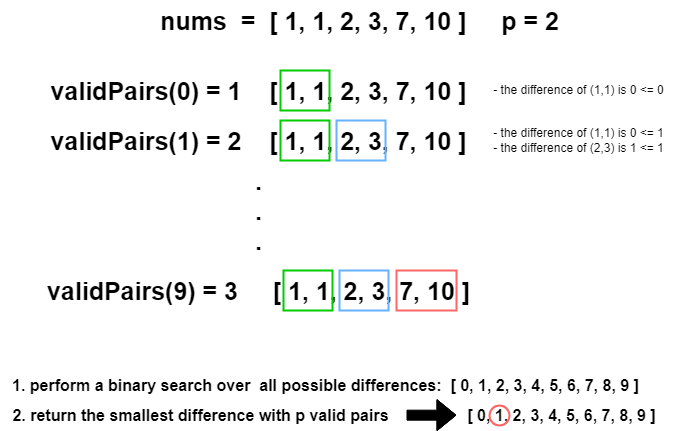

### 81. Search in Rotated Sorted Array II

In [ ]:
class Solution:
    def bin(self, nums: List[int], l: int, r: int, target: int) -> int:
        if l <= r:
            m = l + (r-l)//2
            print(f'l = {l}  r = {r}  m = {m}  nums[m] = {nums[m]}')
            if nums[m] == target:
                return m
            elif nums[r] == target:
                return r
            elif nums[m-1] == target:
                return m-1
            #case 1 / 2
            elif nums[m-1] >= target and nums[r] >= target or nums[m-1] <= target and nums[r] <= target:
                if nums[m-1] < nums[r]:
                    return self.bin(nums, l, m-1, target)
                else:
                    return self.bin(nums, m+1, r, target)
            #case 3
            elif nums[m-1] >= target and not nums[r] >= target:
                return self.bin(nums, l, m-1, target)
            #case 4
            elif nums[r] >= target and not nums[m-1] >= target:
                return self.bin(nums, m+1, r, target)
        else:
            return -1
    def search(self, nums: List[int], target: int) -> int:
        # have to search unique values in nums
        nums = sorted(list(set(nums)))

        # case 1 topleft and topright >= target  -> go with lesser top
        # case 2 topleft and topright <= target  -> go with lesser top
        # case 3 topleft >= target and topright not >= target -> go left
        # case 4 topright >= target and topleft not >= target -> go right

        return self.bin(nums, 0, len(nums)-1, target) != -1

- The only two ways in which this problem differs from its predecessor are that it expects a boolean value whether the `target` exists in the given list `nums`, and that the values are not unique.
- Therefore, I slightly modified my solution to transform `nums` into a list containing only unique values, and instead of returning the actual index of the `target`, I return `True` if the value exists in `nums`, and `False`, otherwise.

### 518. Coin Change II

In [ ]:
class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
        dp = [0] * (amount+1)  # one index per amount from 0 to amount
        dp[0] = 1  # there is exactly 1 way to make 0 (by using no coins)
        for coin in coins:
            for i in range(coin, amount+1):
                dp[i] += dp[i-coin]
        return dp[amount]

- As with most dynamic programming problems so far, I have not been able to come up with the solution myself.
- We utilize a dynamic programming list `dp` to build up the solution incrementally. Every index represents an `amount` that can be made up with the `coins`, and the value at an index represents the number of ways that `amount` can be made up.
- How it works is best explained in the graphic below.

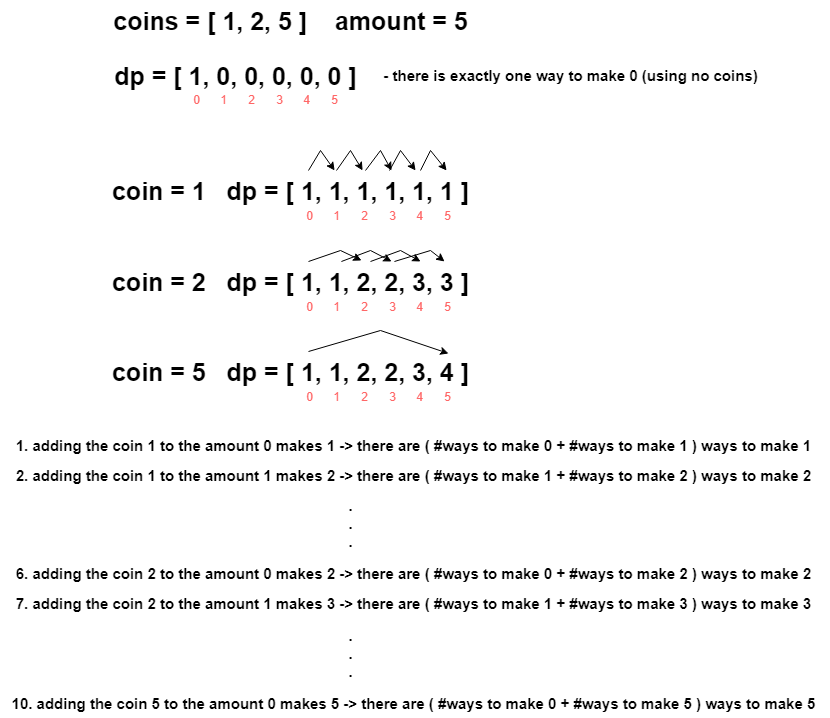

### 63. Unique Paths II

In [ ]:
class Solution:
    def uniquePathsWithObstacles(self, obstacleGrid: List[List[int]]) -> int:
        ROWS,COLS = len(obstacleGrid),len(obstacleGrid[0])
        dp = [ [0]*COLS for _ in range(ROWS) ]
        dp[-1][-1] = 1

        def dfs(row,col):
            if row >= ROWS or col >= COLS or obstacleGrid[row][col] == 1:
                return 0
            if not dp[row][col]:
                dp[row][col] = dfs(row+1, col) + dfs(row,col+1)
            return dp[row][col]

        return dfs(0,0)

- We perform a **Depth-first search** combined with a dynamic programming list, `dp`, that stores the number of paths for every field in the `obstacleGrid`.
- For this, we set the field of the goal to `1`, and every other field will receive the sum of its lower and right neighbors as its number of paths.

### 2369. Check if There is a Valid Partition For The Array

#### My Initial Attempt:

In [ ]:
class Solution:
    def validPartition(self, nums: List[int]) -> bool:
        
        res = False
        def bt(pos):
            nonlocal res
            if pos == len(nums):
                res = True
                return
            
            for i in range(pos, len(nums)):
                if isValid(nums[pos:i+1]):
                    if res: return
                    bt(i+1)
            return

        def isValid(p):
            if len(p) < 2 or len(p) > 3: return False
            if (len(p) == 2 or len(p) == 3) and len(set(p)) == 1: return True

            for i,num in enumerate(p):
                if i < len(p)-1:
                    if p[i+1] - num != 1:
                        return False 
            return i == 2

        bt(0)
        return res

- Initially, I tried solving this problem with a **backtracking** approach, but it ended up not being efficient enough.

#### Improved Solution:

In [ ]:
class Solution:
    def validPartition(self, nums: List[int]) -> bool:

        def isValid(i: int):
            if i < 0: return True

            if ( nums[i] == nums[i-1] and isValid(i-2) ) or \
                ( nums[i] == nums[i-1] == nums[i-2] and isValid(i-3) ) or \
                ( nums[i] == nums[i-1]+1 == nums[i-2]+2 and isValid(i-3) ):
                    return True
            return False
            
        return isValid(len(nums)-1)

- Looking into the editorial it became clear that this problem could be solved recursively.
- How it works is that we start at the last index of `nums`, and recursively moving to the front, we check for the three valid partitions.
- If the last two to three fields form a valid partition and the index ahead of them is also the end of a valid partition, `isValid` returns `True`.

### 215. Kth Largest Element in an Array

In [ ]:
class Solution:
    def findKthLargest(self, nums: List[int], k: int) -> int:
        heap = []
        heapify(heap)

        for n in nums:
            heappush(heap, -n)

        for i in range(k-1):
            heappop(heap)

        return -heap[0]

- We are using the **Heap** implementation from the library `heapq` to solve this problem.
- `heapify` returns a **MinHeap**, so we have to insert negated values for it to act like a **MaxHeap**.
- After converting `nums` to a `heap`, we use the `heappop` method to remove the `k` largest values from the `heap`, and return the largest value, `heap[0]`.

### 86. Partition List

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def partition(self, head: Optional[ListNode], x: int) -> Optional[ListNode]:
        p_head = ListNode()
        p_curr = p_head
        curr = head
        
        prev = None
        while curr:
            if curr.val < x:
                p_curr.next = curr
                p_curr = curr
                if curr == head:
                    head = head.next
                else:
                    prev.next = curr.next
            else:
                prev = curr
            curr = curr.next

        p_curr.next = head
        return p_head.next

- We traverse the given linked list once, and whenever we encounter a node with a value less than `x`, we add it to our partition list that starts with `p_head` and remove it from the original list.
- Lastly, we append the `head` of the original list to the end of our partition list.

### 239. Sliding Window Maximum

In [ ]:
class Solution:
    def maxSlidingWindow(self, nums: List[int], k: int) -> List[int]:
        d = collections.deque()
        l,r = 0,0
        res = []
        while r < len(nums):
            while d and nums[r] > nums[d[-1]]:
                d.pop()
            d.append(r)
            if d[0] < l:
                d.popleft()
            if r+1 >= k:
                l += 1
                res.append(nums[d[0]])
            r += 1
        return res

- For every new window, we pop every value that is smaller than the new right element `nums[r]` from the deque `d` such that `d[0]` will always hold the index to the largest value for each window.
- Every time we shift the window, we also have to ensure that `d` doesn't hold indices that are out of bounds to the left, which is ensured via the second conditional statement.

### 542. 01 Matrix

In [ ]:
class Solution:
    def updateMatrix(self, mat: List[List[int]]) -> List[List[int]]:
        ROWS,COLS = len(mat),len(mat[0])
        grid = [ [0]*COLS for _ in range(ROWS)]
        
        queue,visited = collections.deque(),set()
        for row in range(ROWS):
            for col in range(COLS):
                if mat[row][col] == 0:
                    queue.append((row,col,1))
                    visited.add((row,col))
    
        while queue:
            r,c,d = queue.popleft()
            for row,col in [ (r-1,c),(r,c+1),(r+1,c),(r,c-1) ]:
                if row >= 0 and col >= 0 and row < ROWS and col < COLS and (row,col) not in visited:
                    if mat[row][col] == 1: grid[row][col] = d 
                    queue.append((row,col,d+1))
                    visited.add((row,col))
        
        return grid

- This problem is very similar to the problem *994. Rotting Oranges* in that in both of them, you have to perform a **Breadth-first search with multiple starting points**.
- The starting points are all fields that contain a `0` and will be added to the `queue` and `visited` initially, and whenever we encounter a field with a `1` in our BFS, we set the value in that field to the search depth `d`.

### 1615. Maximal Network Rank

In [ ]:
class Solution:
    def maximalNetworkRank(self, n: int, roads: List[List[int]]) -> int:
        if len(roads) == 0: return 0
        
        adjMap = defaultdict(list)
        for e1,e2 in roads:
            adjMap[e1].append(e2)
            adjMap[e2].append(e1)
            
        adjMap = dict(reversed(sorted(adjMap.items(), key=lambda item: len(item[1]))))
        nodes = list(adjMap.keys())
        l0,l1 = len(adjMap[nodes[0]]),len(adjMap[nodes[1]])
        maxV = 0
        
        for i in range(len(nodes)):
            ni_edges = adjMap[nodes[i]]
            if len(ni_edges) != l0: break

            for j in range(i+1,len(nodes)):
                nj_edges = adjMap[nodes[j]]
                if len(nj_edges) != l1: break

                sumV = len(ni_edges) + len(nj_edges)
                sumV = sumV-1 if nodes[j] in adjMap[nodes[i]] else sumV
                if sumV > maxV: maxV = sumV
        
        return maxV

- We create an adjacency map, `adjMap`, that holds a list of connected edges for every node.
- Then we sort `adjMap` by the number of edges such that the nodes with the largest number of edges are at the front.
- Lastly, we have to iterate over all combinations of two nodes with the same number of edges as the top two nodes (`l0` and `l1`) to find two nodes that are not connected to each other.

### 1489. Find Critical and Pseudo-Critical Edges in Minimum Spanning Tree

#### My Initial Attempt:

In [ ]:
class Solution:
    def getMST(self, n, edges):
        parents = list(range(n+1))
        ranks = [1] * (n+1)

        def find(n):
            p = parents[n]
            while p != parents[p]:
                p = parents[p]
            return p
        
        def union(n1, n2):
            p1,p2 = find(n1),find(n2)
            if p1 == p2: return False
            if ranks[p1] > ranks[p2]:
                parents[p2] = p1
                ranks[p1] += ranks[p2]
            else:
                parents[p1] = p2
                ranks[p2] += ranks[p1]
            return True

        edges.sort(key=lambda e: e[2])

        mst,mst_len = [], 0
        for n1, n2, n3 in edges:
            if union(n1,n2):
                mst.append([n1,n2])
                mst_len += n3
        
        return mst, mst_len

    def findCriticalAndPseudoCriticalEdges(self, n: int, edges: List[List[int]]) -> List[List[int]]:
        # we have to copy edges to maintain their ordering because passing edges to getMST causes it to be mutated
        initialMST, initialSum = self.getMST(n, edges.copy())
        print(f'initial MST: {initialMST} ({initialSum})')

        critical,pseudo = [],set()
        prevEdges = set([tuple(e) for e in initialMST])
        for i in range(len(edges)):
            mst,s = self.getMST(n, edges[:i] + edges[i+1:])
            print(f'[{i}] MST: {mst} ({s})')   
            if s != initialSum: 
                critical.append(i)
            elif s == initialSum:
                currEdges = set([tuple(e) for e in mst])
                pseudo.update( prevEdges.difference(currEdges) )
                pseudo.update( currEdges.difference(prevEdges) )
                prevEdges = currEdges
                print(f'[{i}] updated pseudo-critical: {pseudo}')

        pseudo = [ i for i in range(len(edges)) if tuple(edges[i][:2]) in pseudo ]
        return [critical, pseudo]

- Unfortunately, this does not work due to some edge cases where iterating over all `edges` and calculating the **Minimum Spanning Tree** via `getMST` does not result in all possible MSTs.
- I will eventually try to fix my code and get it accepted, but for now I will only leave this here.

### 1203. Sort Items by Groups Respecting Dependencies

In [ ]:
class Solution:
    def kahn(self, nodes, constraints):
        in_degree = defaultdict(int)
        edges = defaultdict(list)
        for n1,n2 in constraints:
            edges[n1].append(n2)
        print('\n---------KAHN-------------')
        print(f'nodes: {nodes}  constraints: {constraints}')
        print(f'in_degree: {dict(in_degree)}  edges: {dict(edges)}')

        # calculate in degrees for all nodes
        for n1 in edges:
            for n2 in edges[n1]:
                in_degree[n2] += 1

        # put all nodes with an in degree of 0 into the queue
        queue = collections.deque()
        for node in nodes:
            if in_degree[node] == 0:
                queue.append(node)

        # perform kahn's algorithm (sequentially removing nodes when they have in degree 0)
        count,ordering = 0,[]
        while queue:
            n1 = queue.popleft()
            ordering.append(n1)

            for n2 in edges[n1]:
                in_degree[n2] -= 1
                if in_degree[n2] == 0: queue.append(n2)
            count += 1

        # if there are still nodes left, we have a cycle, in which case we return an empty list
        if count != len(nodes): 
            print([])
            return []
        else: 
            print(ordering)
            return ordering


    def sortItems(self, n: int, m: int, group: List[int], beforeItems: List[List[int]]) -> List[int]:
        groups = defaultdict(list)
        internal_constraints,external_constraints = defaultdict(list),[]
        z_list = list(zip(group, beforeItems))

        # construct the dictionary 'groups' that holds each group with a unique identifier
        unique = -1
        for i in range(len(group)):
            if group[i] == -1:
                groups[unique].append(i)
                group[i] = unique
                unique -= 1
            else:
                groups[group[i]].append(i)

        # construct internal cosntraints for each group and external constraints for all groups
        for item,t in enumerate(z_list):
            for before in t[1]:
                if group[item] == group[before]:
                    internal_constraints[group[item]].append([before,item])
                else:
                    external_constraints.append([group[before],group[item]])
        print(f'zipped list:          {z_list}\ngroups:               {dict(groups)}\ninternal constraints: {dict(internal_constraints)}\nexternal constraints: {external_constraints}')

        # Step 1: fulfill internal constraints
        for group in internal_constraints.keys():
            sorted_group = self.kahn(groups[group], internal_constraints[group])
            if not sorted_group: return sorted_group
            groups[group] = sorted_group
        print(f'\ngroups (step 1):      {dict(groups)}')

        # Step 2: fulfill external constraints 
        sorted_groups = []
        if external_constraints:
            nodes = list(set([ group for constraint in external_constraints for group in constraint ]))
            sorted_groups = self.kahn(nodes, external_constraints)
            if not sorted_groups: return sorted_groups
        print(f'\ngroups (step 2):      {dict(groups)}')

        # Step 3: return result
        res = []
        for group in sorted_groups:
            res.append(groups[group])
        for group in groups.values():
            if group not in res: res.append(group)
        res_flat = []
        for l in res:
            res_flat += l
        
        return res_flat

- Wow, I feel like I have been able to learn a lot from this problem; it certainly took a while to complete.
- First, we extract the internal constraints (how do nodes have to be rearranged within groups) and the external constraints (how do the groups have to be rearranged) from the given `group` and `beforeItems`.
- Then, we use **Kahn's Algorithm** to first rearrange the groups internally, using `internal_constraints`, and then rearrange the groups using `external_constraints`.

### 459. Repeated Substring Pattern

In [ ]:
class Solution:
    def repeatedSubstringPattern(self, s: str) -> bool:
        def constructible(sub):
            constructed = ""
            while len(constructed) < len(s):
                constructed += sub
                if constructed != s[:len(constructed)]: return False
            return True
        
        for i in range(len(s)//2):
            if len(s)%(i+1): continue
            if constructible(s[:i+1]):
                return True
        return False

- We iterate over the first half of the given string `s` and try out every substring in that range using the helper function `constructible`.
- When a substring can be made into the original string, `constructible` returns `True`, and we return `True`.

### 168. Excel Sheet Column Title

In [ ]:
class Solution:
    def convertToTitle(self, columnNumber: int) -> str:
        n = 7
        offsets = [0]*n
        for i in range(1,n):
            offsets[i] = offsets[i-1] + 26**i

        res = ""
        for j in reversed(range(n)):
            if offsets[j] >= columnNumber: continue
            counter = 0
            while offsets[j] < columnNumber:
                counter += 1
                columnNumber -= 26**j
            res += chr(64+counter)

        return res

- The solution to this problem was a bit tricky to figure out considering that it is rated easy.
- First, we initialize a list of `offsets` that will store the beginning number for every letter index.
- Then, we iterate from `26` to the power of `0` to `26` to the power of a sufficiently large `n`, and add the corresponding letter for every offset to our result `res`.

### 767. Reorganize String

In [ ]:
class Solution:
    def reorganizeString(self, s: str) -> str:
        c = collections.Counter(s)
        l = [t[0] for t in c.most_common(2)]
        
        res = ""
        while l:
            if res and res[-1] == l[0]: return ""
            res += f"{l[0]}{l[1]}" if len(l) == 2 else f"{l[0]}"
            c.subtract(l)
            l = [t[0] for t in c.most_common(2) if t[1] > 0]
        return res

- This problem is very similar to *621. Task Scheduler* in that the letters of the string could be interpreted as tasks, and the cooldown for each task is 1 round.
- All that is left to do then is to append the most frequent task and the second most frequent task to the string until there are no more tasks left.

### 68. Text Justification

In [ ]:
class Solution:
    def fullJustify(self, words: List[str], maxWidth: int) -> List[str]:
        res = []
        
        # Step 1 extract the string into proper lines
        lines = []
        curr,c_len,spaces = [],0,0
        for word in words:
            if len(word) + c_len + spaces < maxWidth:
                curr.append(word)
                c_len += len(word)
                spaces = len(curr)-1 if len(curr)>1 else 0
            else: 
                if c_len > 0: lines.append([curr.copy(),c_len,spaces])
                curr.clear()
                curr.append(word)
                c_len = len(word)
                spaces = 0
        lines.append([curr,c_len,spaces])
        
        
        # Step 2 properly insert spaces into the lines
        for j,line in enumerate(lines):
            if j == len(lines)-1: # the last line should be left justfified
                s = " ".join(lines[j][0])
                res.append(s.ljust(maxWidth))
                break
            fields,available = line[2],maxWidth-line[1]
            per_field = available // fields if fields > 0 else available
            extra = available % fields if fields > 0 else 0
            
            s = ""
            for i,word in enumerate(line[0]):
                s += word
                if i == len(line[0])-1: 
                    if i == 0: s = s.ljust(maxWidth) # left justify lines containing one word
                    break # dont add spaces after the last word in a line
                s += "".rjust(per_field)
                if extra: 
                    s += " "
                    extra -= 1
            res.append(s)
        
        return res

- We solve this problem in two distinct steps.
- The first step is to fill a list of `lines` using a greedy approach (we keep adding words to a `line` as long as the sum of their length plus one space between every two words doesn't exceed `maxWidth`).
- The second step is to convert every `line` into a string, making sure to insert the proper amount of spaces between words.

### 97. Interleaving String

In [ ]:
class Solution:
    def isInterleave(self, s1: str, s2: str, s3: str) -> bool:
        
        m = dict()
        found = False
        def bt(s1, s2, s3):
            nonlocal found
            if found: 
                return True
            if not s1 and not s2 and not s3: 
                found = True
                return True
            if (s1,s2) in m:
                return m[(s1,s2)]
            
            r1,r2 = False,False
            if s3 and s1 and s1[0] == s3[0]:
                r1 = bt(s1[1:], s2, s3[1:])
            if s3 and s2 and s2[0] == s3[0]:
                r2 = bt(s1, s2[1:], s3[1:])
                
            m[(s1,s2)] = r1 or r2
            return r1 or r2
        
        return bt(s1,s2,s3)

- I solved this problem with a **Backtracking** approach combined with **Memoization**.
- How it works is that we try all possible ways of constructing `s3` from `s1` and `s2` and cut off whenever we reach a state where the first letter of `s3` does not match either of the first letters of `s1` and `s2`.
- We save the results in a dictionary `m` such that we can avoid recalculating a result that we have already calculated.

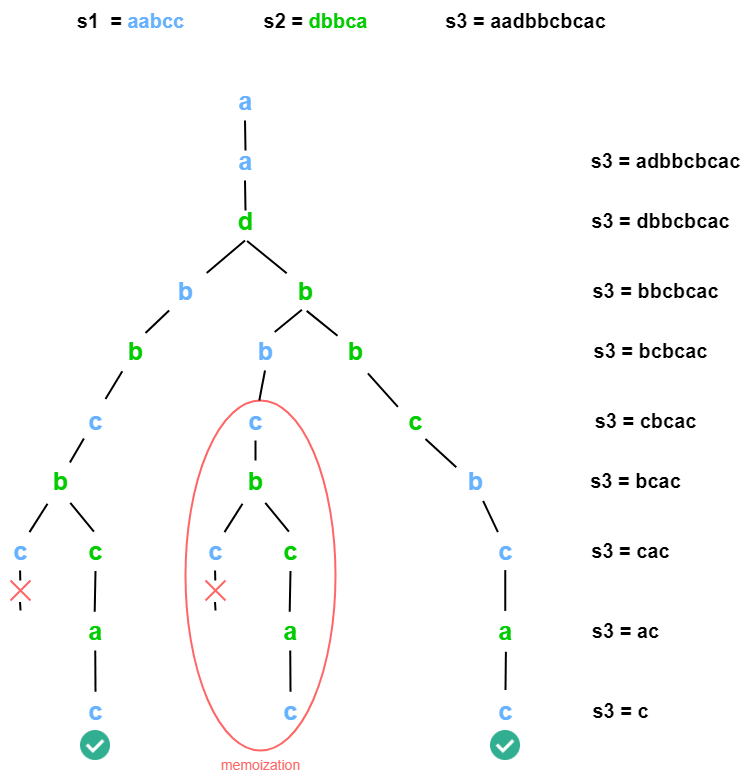

### 646. Maximum Length of Pair Chain

In [ ]:
class Solution:
    def findLongestChain(self, pairs: List[List[int]]) -> int:
        s_pairs = sorted(pairs, key=lambda x: x[1])
        
        curr,count = s_pairs[0],1
        for pair in s_pairs:
            if pair[0] > curr[1]:
                curr = pair
                count += 1

        return count

- This problem could be solved by sorting the given `pairs` by their second values and then iterating over the sorted pairs, `s_pairs`, to construct the largest chain or keep track of its length.
- This works because we are creating groups of `pairs` that are grouped by their second value, and since these groups are ordered in incrementing order, we are guaranteed that the next fitting `pair` that we find in our iteration is the smallest possible next chain link.
- It is also important to note that each group will have at most one chain link that it adds to the chain.

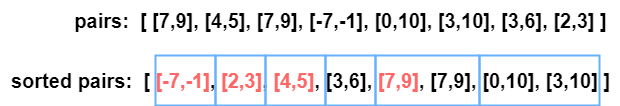